# Project 11 -- Aayushi Akhouri

## Question 1

In [1]:
library(lubridate)

countries <- c('US', 'DE', 'CA', 'FR')


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# Choose either the for loop or the sapply function for creating `yt`

# EITHER use a for loop to create the data frame `yt`
yt <- data.frame()
for (c in countries) {
    filename <- paste0("/depot/datamine/data/youtube/", c, "videos.csv")
    dat <- read.csv(filename)
    dat$country_code <- c
    yt <- rbind(yt, dat)
}

In [3]:
dim(yt)

[1] 163394     17

In [4]:
# OR use an sapply function to create the data frame `yt`
myDFlist <- lapply( countries, function(c) {
                    dat <- read.csv(paste0("/depot/datamine/data/youtube/", c, "videos.csv"))
                    dat$country_code <- c
                    return(dat)} )
yt <- do.call(rbind, myDFlist)

In [5]:
dim(yt)

[1] 163394     17

In [6]:
# convert columns to date formats
yt$trending_date <- ydm(yt$trending_date)
yt$publish_time <- ymd_hms(yt$publish_time)

# extract the trending_year and publish_year
yt$trending_year <- year(yt$trending_date)
yt$publish_year <- year(yt$publish_time)

In [8]:
head(yt)

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country_code,trending_year,publish_year
<chr>,<date>,<chr>,<chr>,<int>,<dttm>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,US,2017,2017
1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13 07:30:00,last week tonight trump presidency|last week tonight donald trump|john oliver trump|donald trump,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight",US,2017,2017
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12 19:05:24,racist superman|rudy|mancuso|king|bach|racist|superman|love|rudy mancuso poo bear black white official music video|iphone x by pineapple|lelepons|hannahstocking|rudymancuso|inanna|anwar|sarkis|shots|shotsstudios|alesso|anitta|brazil|Getting My Driver's License | Lele Pons,3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nLele Pons | http://youtube.com/c/lelepons\nKing Bach | https://youtube.com/user/BachelorsPadTv\n\nVideo Effects: \nCaleb Natale | https://instagram.com/cal

In [10]:
tag_test <- yt$tags[2]
tag_test

[1] "last week tonight trump presidency|last week tonight donald trump|john oliver trump|donald trump"

In [14]:
strsplit(yt$tags[2], "\\|") [[1]]

[1] "last week tonight trump presidency" "last week tonight donald trump"    
[3] "john oliver trump"                  "donald trump"

In [16]:
length(strsplit(yt$tags[2], "\\|") [[1]])

[1] 4

In [26]:
count_tags<-function(x) {length(strsplit(x, "|",fixed=TRUE) [[1]])}

In [19]:
count_tags(yt$tags[2])

[1] 4

In [20]:
count_tags(tag_test)

[1] 4

In [27]:
count_tags(yt$tags[6])

[1] 7

In [28]:
head(yt$tags)

[1] "SHANtell martin"                                                                                                                                                                                                                                                                                                                                                                                                                          
[2] "last week tonight trump presidency|last week tonight donald trump|john oliver trump|donald trump"                                                                                                                                                                                                                                                                                                                                         
[3] "racist superman|rudy|mancuso|king|bach|racist|superman|love|rudy mancuso poo bear black white official music video|iphone x by pineapple|lelepons|hannahstocking|rudymancuso|inanna|anwar|sarkis|shots|shotsstudios|alesso|anitta|brazil|Getting My Driver's License | Lele Pons"                                                                                                                                                         
[4] "rhett and link|gmm|good mythical morning|rhett and link good mythical morning|good mythical morning rhett and link|mythical morning|Season 12|nickelback lyrics|nickelback lyrics real or fake|nickelback|nickelback songs|nickelback song|rhett link nickelback|gmm nickelback|lyrics (website category)|nickelback (musical group)|rock|music|lyrics|chad kroeger|canada|music (industry)|mythical|gmm challenge|comedy|funny|challenge"
[5] "ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|dares|no truth|comments|comedy|funny|stupid|fail"                                                                                                                                                                                                                                                                                                                                           
[6] "ijustine|week with iPhone X|iphone x|apple|iphone|iphone x review|iphone x unboxing"

Markdown notes and sentences and analysis written here.

## Question 2

In [29]:
sapply(head(yt$tags), count_tags)

SHANtell martin 
                                                                                                                                                                                                                                                                                                                                                                                                                                        1 
                                                                                                                                                                                                                                                                                                                                         last week tonight trump presidency|last week tonight donald trump|john oliver trump|donald trump 
                                                                                                                                                                                                                                                                                                                                                                                                                                        4 
                                                                                                                                                         racist superman|rudy|mancuso|king|bach|racist|superman|love|rudy mancuso poo bear black white official music video|iphone x by pineapple|lelepons|hannahstocking|rudymancuso|inanna|anwar|sarkis|shots|shotsstudios|alesso|anitta|brazil|Getting My Driver's License | Lele Pons 
                                                                                                                                                                                                                                                                                                                                                                                                                                       23 
rhett and link|gmm|good mythical morning|rhett and link good mythical morning|good mythical morning rhett and link|mythical morning|Season 12|nickelback lyrics|nickelback lyrics real or fake|nickelback|nickelback songs|nickelback song|rhett link nickelback|gmm nickelback|lyrics (website category)|nickelback (musical group)|rock|music|lyrics|chad kroeger|canada|music (industry)|mythical|gmm challenge|comedy|funny|challenge 
                                                                                                                                                                                                                                                                                                                                                                                                                                       27 
                                                                                                                                                                                                                                                                                                                                           ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|dares|no truth|comments|comedy|funny|stupid|fail 
                                                                                                                                                                                                                                                                                                                                                                                                                                       14 
                                                                                                                                            

In [57]:
yt$n_tags <- sapply(yt$tags, count_tags)

In [58]:
head(yt)

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country_code,trending_year,publish_year,n_tags
<chr>,<date>,<chr>,<chr>,<int>,<dttm>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,US,2017,2017,1
1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13 07:30:00,last week tonight trump presidency|last week tonight donald trump|john oliver trump|donald trump,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight",US,2017,2017,4
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12 19:05:24,racist superman|rudy|mancuso|king|bach|racist|superman|love|rudy mancuso poo bear black white official music video|iphone x by pineapple|lelepons|hannahstocking|rudymancuso|inanna|anwar|sarkis|shots|shotsstudios|alesso|anitta|brazil|Getting My Driver's License | Lele Pons,3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nLele Pons | http://youtube.com/c/lelepons\nKing Bach | https://youtube.com/user/BachelorsPadTv\n\nVideo Effects: \nCaleb Natale | https://

In [59]:
table(yt$country_code)


   CA    DE    FR    US 
40881 40840 40724 40949 

In [69]:
videoDEorUS<-subset(yt, (country_code == "DE")|(country_code =="US"))

In [70]:
dim(yt)

[1] 163394     20

In [71]:
dim(videoDEorUS)

[1] 81789    20

In [72]:
videoDEorUS$video_id[which.max(videoDEorUS$n_tags)]

[1] "4AelFaljd7k"

In [73]:
videoDEorUS$title[which.max(videoDEorUS$n_tags)]

[1] "TOP 20 SINGLE CHARTS ►27. Dezember 2017 [FullHD]"

In [74]:
videoDEorUS$n_tags[which.max(videoDEorUS$n_tags)]

[1] 97

In [75]:
table(videoDEorUS$n_tags)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
5768  827 1197 2328 1946 2261 2355 2332 2397 2600 2267 2319 2639 2156 2350 1984 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
2257 2258 2309 2223 2134 2083 2078 2328 2334 1995 2036 1895 1715 2117 1483 1577 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
1494 1188 1120 1129  876  814  633  571  422  390  404  236  333  220  219  143 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
 177  113  156   48   45   61   52   49   36   50   34   34   22   27   28    1 
  65   66   67   68   69   73   74   75   78   79   80   97 
   7    2   69    2   19    5    4    1    2    2    2    1 

Markdown notes and sentences and analysis written here.

## Question 3

In [76]:
head(videoDEorUS$views)

[1]  748374 2418783 3191434  343168 2095731  119180

In [77]:
head(videoDEorUS$n_tags)

[1]  1  4 23 27 14  7

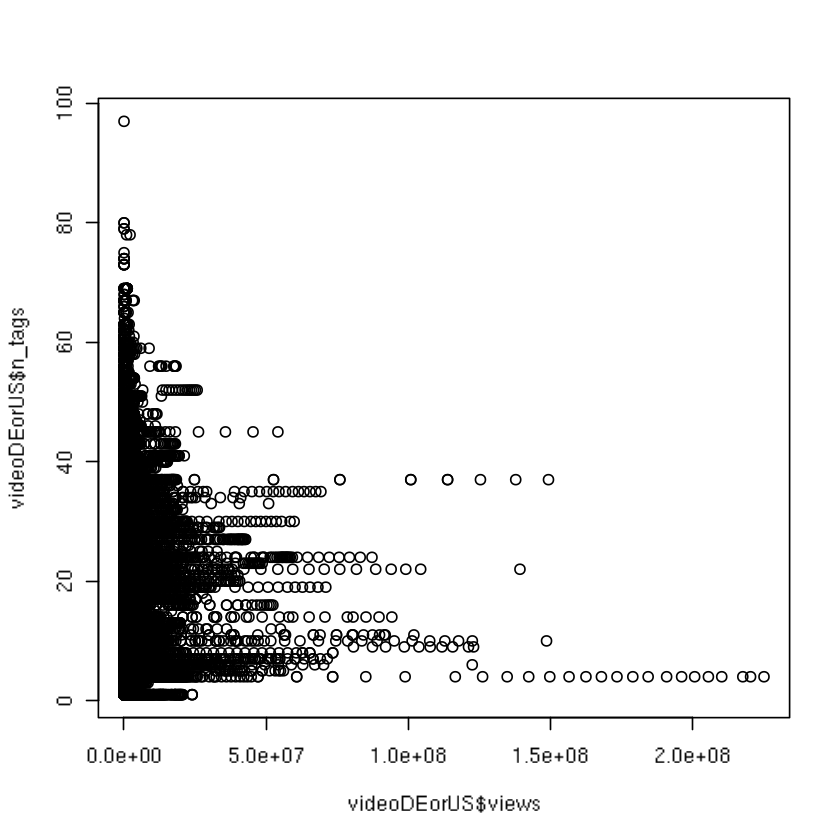

In [78]:
plot(videoDEorUS$views , videoDEorUS$n_tags)

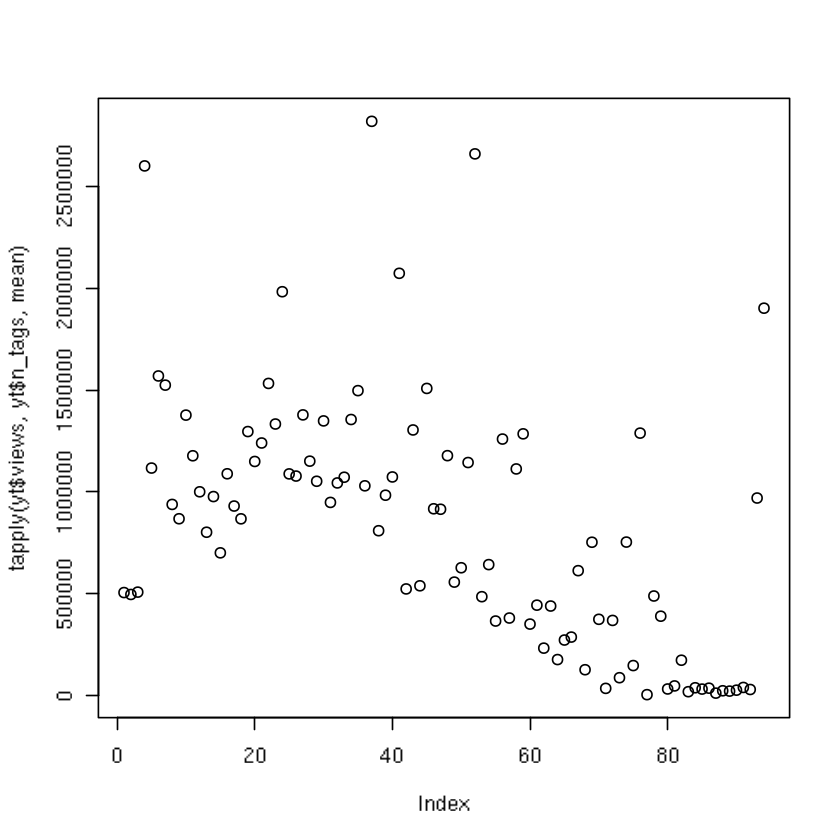

In [80]:
plot(tapply(yt$views , yt$n_tags, mean))

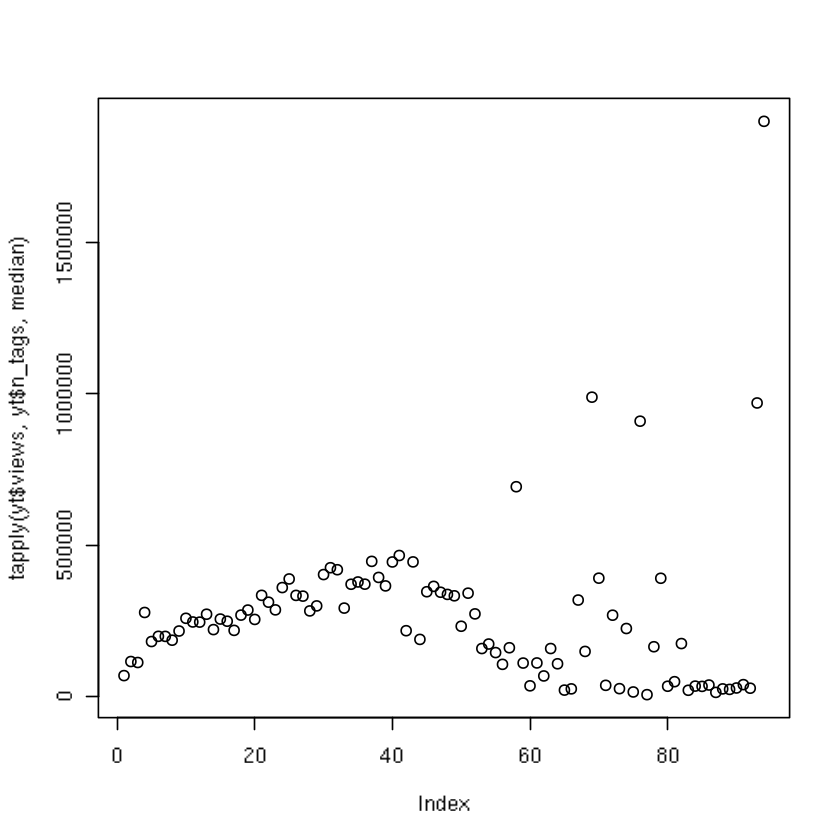

In [81]:
plot(tapply(yt$views , yt$n_tags, median))

To maximise the number of views a youtuber my have around 40 tags in his video

## Question 4

In [82]:
tapply(yt$views , yt$country , mean)

CA        DE        FR        US 
1147035.9  603455.3  419921.9 2360784.6

In [87]:
tapply(yt$comment_count , yt$country , mean)

CA       DE       FR       US 
5042.975 2785.857 1832.453 8446.804

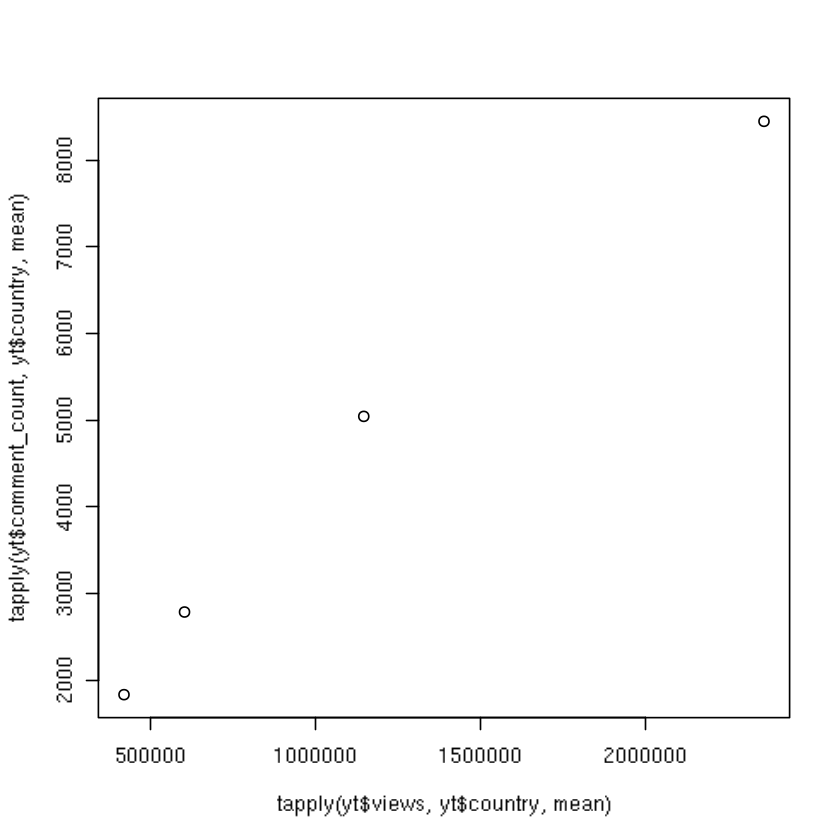

In [88]:
plot(tapply(yt$views , yt$country , mean),tapply(yt$comment_count , yt$country , mean))

US has the highest number of comments followed by Canada, Germany and then France.

This seems a fair method to check if a video is trending in a country.

## Question 5

In [90]:
tapply(yt$likes , yt$country , mean)

CA       DE       FR       US 
39582.69 21875.50 17388.86 74266.70

In [82]:
tapply(yt$views , yt$country , mean)

CA        DE        FR        US 
1147035.9  603455.3  419921.9 2360784.6

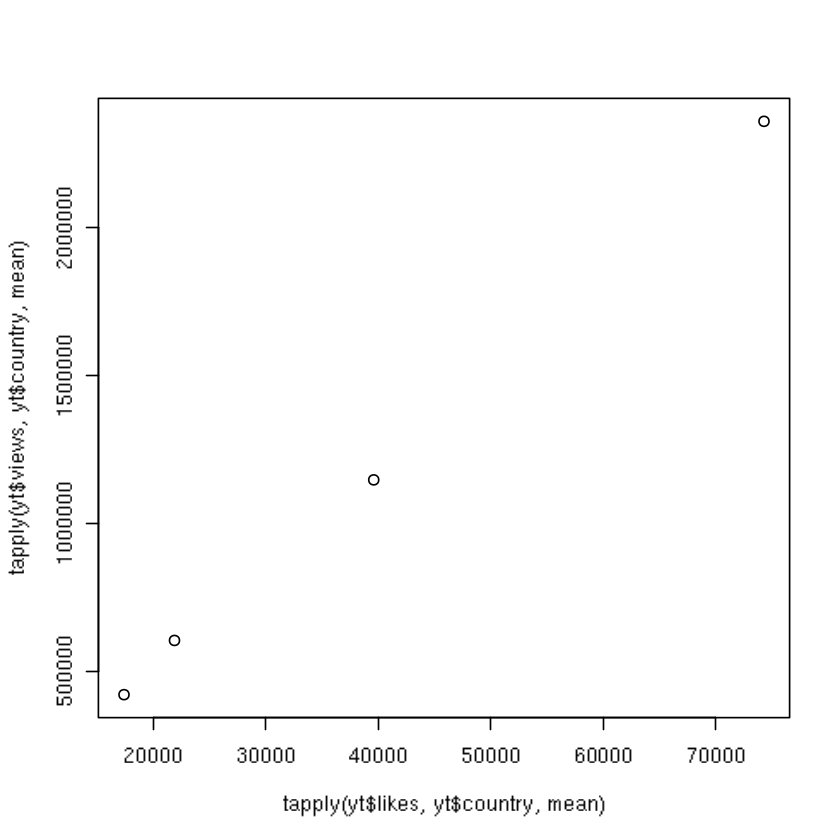

In [92]:
plot(tapply(yt$likes , yt$country , mean),tapply(yt$views , yt$country , mean))

The video from Canada has the highest views wheres the video from US has the highest like

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.